O presente estudo discorre sobre [microdados](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) do ENEM (Exame Nacional do Ensino Médio) 2023. Não obstante, foram selecionados apenas registros referentes as provas realizadas no estado do Amapá.

# PREPARAÇÃO, ORGANIZAÇÃO E ESTRUTURAÇÃO DOS DADOS

In [1]:
# Manipulação e análise de dados
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 25)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/enem2023/enem_ap2023_tratado.csv",
                 sep=';', encoding="utf-8")

df.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ESCOLA,ENSINO,MUNICIPIO_ESC,UF_ESC,DEPENDENCIA_ADM_ESC,LOCALIZACAO_ESC,SIT_FUNC_ESC,MUNICIPIO_PROVA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,210059587847,19 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,522.7,544.6,528.5,432.2,Espanhol,160.0,180.0,180.0,160.0,200.0,880.0
1,210059388096,19 anos,M,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,539.4,551.7,570.4,420.7,Espanhol,120.0,140.0,140.0,120.0,40.0,560.0
2,210059982331,26-30 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Santana,393.0,501.7,511.6,349.0,Espanhol,100.0,120.0,120.0,120.0,60.0,520.0
3,210058941508,21 anos,F,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,484.9,504.8,503.4,445.7,Espanhol,140.0,180.0,160.0,160.0,120.0,760.0
4,210059855130,17 anos,M,1,Parda,Brasileiro(a),Pública,Regular,Santana,AP,Estadual,Urbana,Ativa,Santana,502.2,516.9,474.3,590.9,Espanhol,160.0,180.0,160.0,160.0,160.0,820.0


In [4]:
df.shape

(14793, 25)

O conjunto de dados original possui 14793 registros e 25 colunas.

1\. OTIMIZAÇÃO DOS DADOS  
Apesar de não haver muitos registros, vamos implementar uma redução do espaço ocupado como boa-prática.

In [5]:
# Verificando tamanho do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INSCRICAO            14793 non-null  int64  
 1   FAIXA_ETARIA         14793 non-null  object 
 2   SEXO                 14793 non-null  object 
 3   ESTADO_CIVIL         14793 non-null  int64  
 4   COR_RACA             14793 non-null  object 
 5   NACIONALIDADE        14793 non-null  object 
 6   ESCOLA               14793 non-null  object 
 7   ENSINO               5308 non-null   object 
 8   MUNICIPIO_ESC        3307 non-null   object 
 9   UF_ESC               3307 non-null   object 
 10  DEPENDENCIA_ADM_ESC  3307 non-null   object 
 11  LOCALIZACAO_ESC      3307 non-null   object 
 12  SIT_FUNC_ESC         3307 non-null   object 
 13  MUNICIPIO_PROVA      14793 non-null  object 
 14  NOTA_CN              14793 non-null  float64
 15  NOTA_CH              14793 non-null 

In [6]:
# Selecionando colunas numéricas por tipo
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [7]:
# Aplicando downcast nas colunas float e int
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

In [8]:
df.drop("INSCRICAO", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FAIXA_ETARIA         14793 non-null  object 
 1   SEXO                 14793 non-null  object 
 2   ESTADO_CIVIL         14793 non-null  int8   
 3   COR_RACA             14793 non-null  object 
 4   NACIONALIDADE        14793 non-null  object 
 5   ESCOLA               14793 non-null  object 
 6   ENSINO               5308 non-null   object 
 7   MUNICIPIO_ESC        3307 non-null   object 
 8   UF_ESC               3307 non-null   object 
 9   DEPENDENCIA_ADM_ESC  3307 non-null   object 
 10  LOCALIZACAO_ESC      3307 non-null   object 
 11  SIT_FUNC_ESC         3307 non-null   object 
 12  MUNICIPIO_PROVA      14793 non-null  object 
 13  NOTA_CN              14793 non-null  float32
 14  NOTA_CH              14793 non-null  float32
 15  NOTA_LC              14793 non-null 

O espaço foi reduzido em aproximadamente 800mb.

# CORRELAÇÃO
Basicamente mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.  

Para esse estudo, vamos analisar a relação entre as notas das provas de alunos de escolas privadas.

## Diretrizes
Alguns critérios são estabelecidos para descobrir se o teste de correlação a ser utilizado deve ser paramétrico ou não-paramétrico, contudo, vamos ter como base a Correlação Linear de Pearson.

1) Escala de medida  
Para escolher o tipo de correlação adequado, primeiro precisamos identificar a escala de medida das variáveis envolvidas.

In [10]:
df2 = df.copy()[df.ESCOLA == 'Privada']

In [11]:
df2.drop(columns=['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR_RACA',
                  'NACIONALIDADE', 'ESCOLA', 'ENSINO', 'MUNICIPIO_ESC',
                  'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC',
                  'SIT_FUNC_ESC', 'MUNICIPIO_PROVA', 'LINGUA', 'NOTA_COMP1',
                  'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5'],
         inplace=True)

In [12]:
df2.head()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
235,528.200012,575.900024,585.500000,674.099976,820.0
241,415.799988,438.899994,409.600006,418.399994,580.0
258,418.100006,585.200012,587.000000,452.899994,360.0
283,596.599976,640.700012,588.599976,700.900024,940.0
495,583.000000,609.799988,615.799988,587.700012,920.0


In [13]:
df2.dtypes

,0
NOTA_CN,float32
NOTA_CH,float32
NOTA_LC,float32
NOTA_MT,float32
NOTA_REDACAO,float32


Observando os resultados, percebemos que as variáveis são do tipo necessário à correlação linear (quantitativa contínua).

2) Independência  
As observações devem ser independentes umas das outras e, conhecendo a natureza das variáveis, sabemos que as mesmas se enquadram nesse requisito.

3) Relação entre as variáveis  
É essencial entender a natureza da relação entre as variáveis (linear ou não).

In [14]:
from pandas.plotting import scatter_matrix
import seaborn as sns

In [15]:
# Definindo um tema de fundo claro
sns.set_theme(style="whitegrid")

In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.rcParams.update({
    'axes.labelcolor': 'gray',
    'xtick.color': 'gray',
    'ytick.color': 'gray',
    'text.color': 'gray'
})

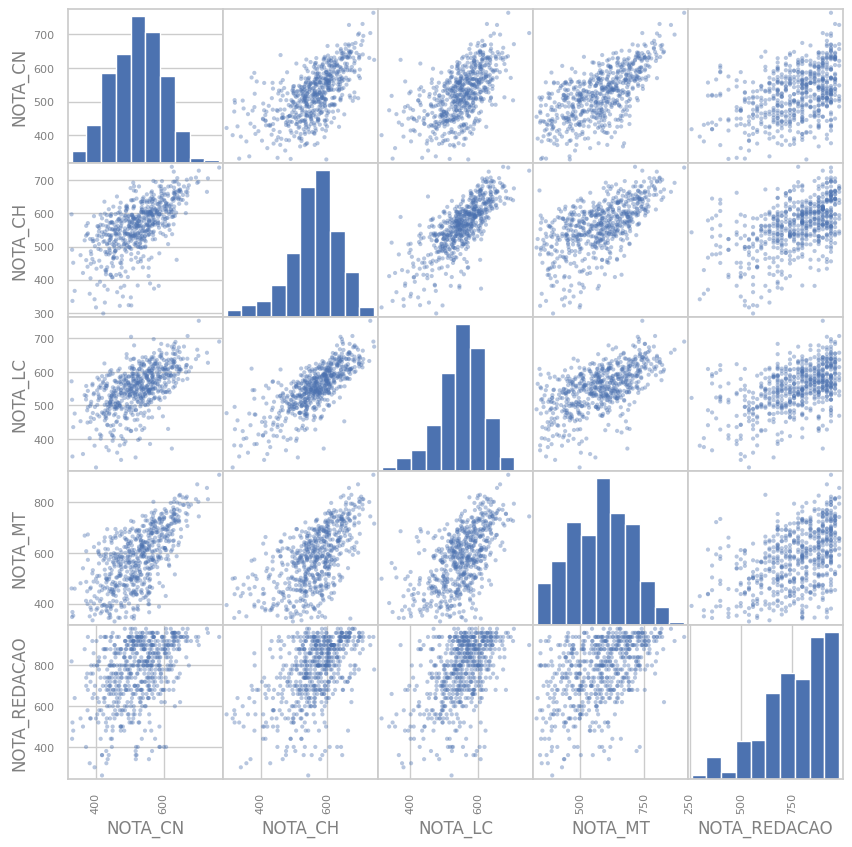

In [18]:
scatter_matrix(df2, alpha=0.4, figsize=(10, 10));

Todas as relações demonstraram ser linear-positiva.

4) Normalidade  
A distribuição das variáveis deve ser aproximadamente normal. Isso é especialmente importante para a significância estatística da correlação.

**TESTES GRÁFICOS**

In [19]:
import matplotlib.pyplot as plt
from scipy import stats


def qq_subplots(df):
    # Número de linhas
    if (len(df.columns) % 2) == 0:
        nrows = int(len(df.columns) / 2)
    else:
        nrows = int((len(df.columns) + 1) / 2)

    # Criação do gráfico
    fig, axes = plt.subplots(nrows, 2, figsize=(12, nrows*4))

    # Achatar os eixos para fácil iteração
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f"QQ-plot de {column}")

    return plt.tight_layout()

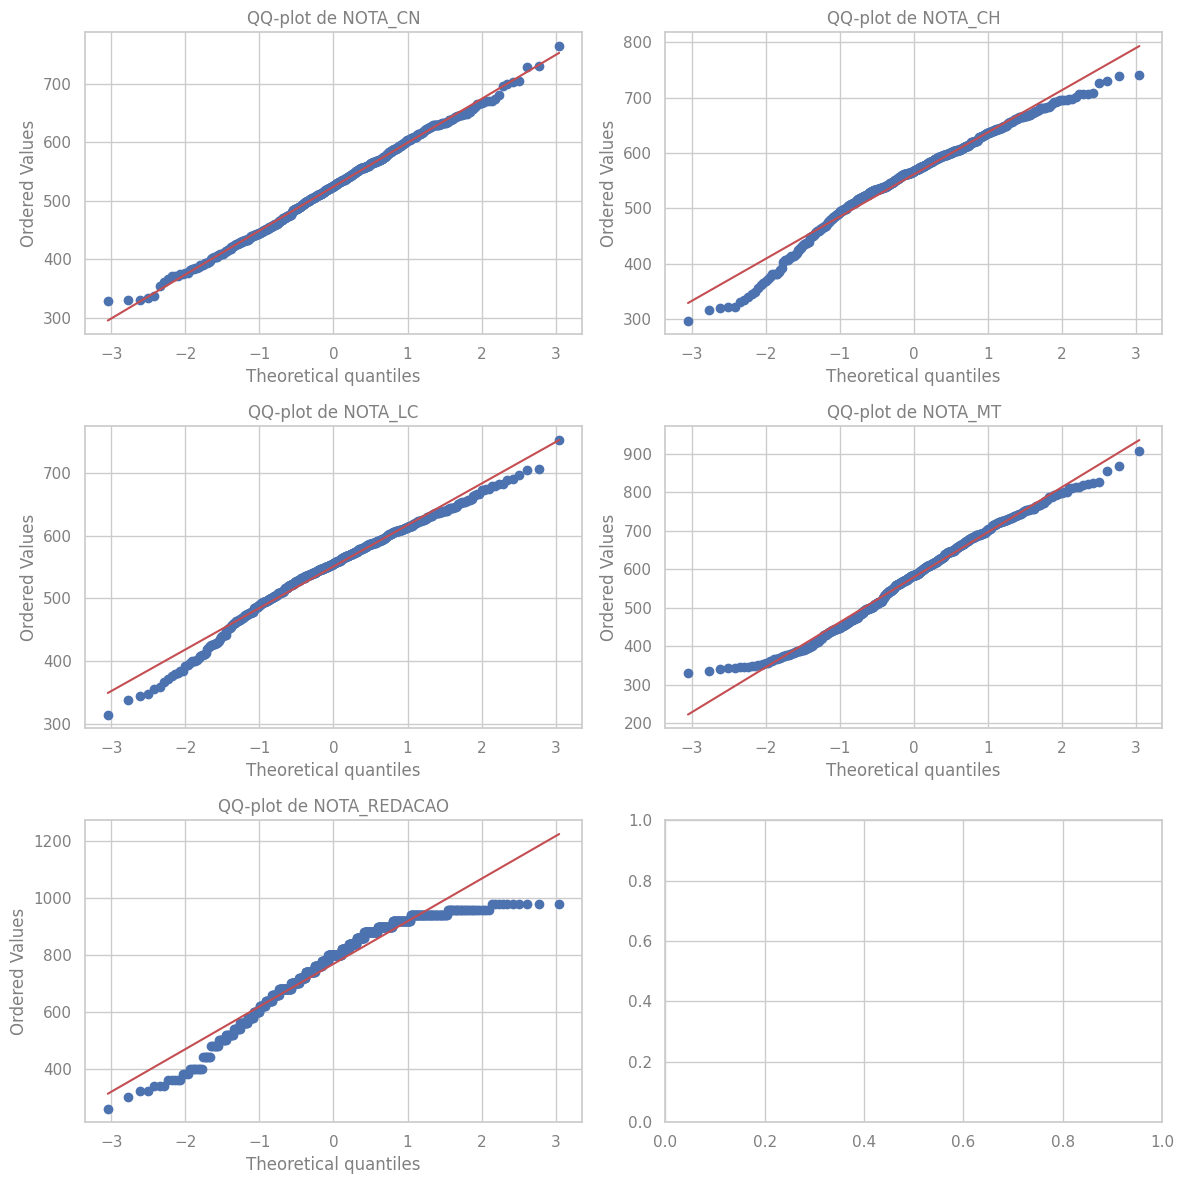

In [20]:
qq_subplots(df2)

No geral, as "caudas" das distribuições aparentemente se desvia da normalidade. Não obstante, uma análise mais precisa com testes numéricos será realizada.

**TESTES NUMÉRICOS**  
Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Os dados seguem uma distribuição normal;
- **H<sub>1</sub>:** Os dados não seguem uma distribuição normal.

In [21]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors


def normalidade(df, cols=None):
    if isinstance(cols, str):
        cols = [cols]
    elif cols == None:
        cols = df.columns

    results = []

    # Vários testes numéricos de normalidade
    for col in cols:
        shapiro = stats.shapiro(df[col])[1]
        lillie = lilliefors(df[col], dist="norm")[1]
        jarque = stats.jarque_bera(df[col])[1]
        anderson = stats.anderson(df[col], dist="norm")[1][2] # alpha = 0.05

        results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                        "JARQUE": jarque, "ANDERSON": anderson})

    # retorna o p-valor das variáveis
    return pd.DataFrame(results, index=cols)

In [22]:
normalidade(df2)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_CN,4.301804e-01,0.605052,3.905181e-01,0.782
NOTA_CH,6.043903e-09,0.001000,3.593939e-12,0.782
NOTA_LC,6.810875e-07,0.001000,9.238867e-09,0.782
NOTA_MT,7.857343e-05,0.081791,2.192716e-03,0.782
NOTA_REDACAO,3.061377e-16,0.001000,4.685301e-16,0.782


Nenhuma variável obteve p-valor maior que o nível de significância alfa em mais de dois testes. Com isso, optamos por rejeitar a hipótese de normalidade para todas as variáveis. Dessa forma, vamos prosseguir com um teste não-paramétrico para analisar a correlação.

## Rho de Spearman
Medida estatística que avalia força e direção de uma relação monotônica entre duas variáveis.

1\. FORÇA E DIREÇÃO  
A força da correlação indica quão fortemente duas variáveis estão relacionadas entre si. Já a direção da correlação revela se a relação entre as variáveis é ascendente ou descendente.

Ao final dos teste de força e direção, as variáveis com a correlação "mais forte" serão escolhidas para avaliação da significância correlacional.

| COEFICIENTE | GRAU |
- | -
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Sem correlação |

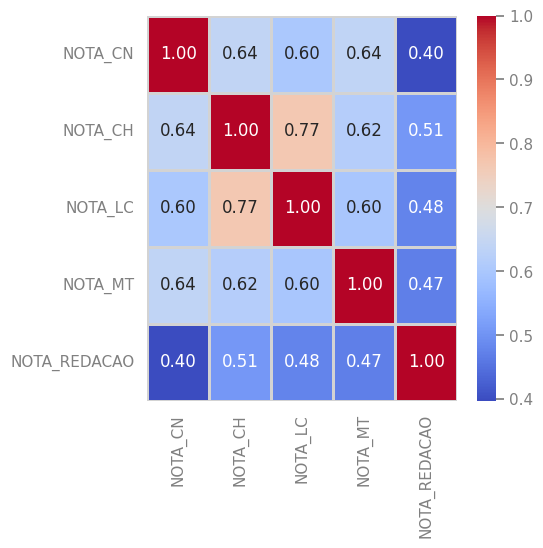

In [23]:
plt.figure(figsize=(df2.shape[1], df2.shape[1]))

sns.heatmap(df2.corr(method="spearman"), annot=True, linecolor='lightgrey',
            fmt=".2f", cmap="coolwarm", cbar=True, linewidths=1);

NOTA_CH possui a "combinação de correlações" mais forte, que vão de moderadas a fortes. Dessa forma, a significância estatística entre as notas das provas de ciências humanas com as demais será testada.

2\. SIGNIFICÂNCIA ESTATÍSTICA  
Testes estatísticos devem ser utilizados para verificar se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub> → ρ de Spearman = 0:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub> → ρ de Spearman ≠ 0:** Há correlação significativa entre as variáveis.

In [24]:
p_valores = []
variaveis = []

for i in df2.columns:
    if i == 'NOTA_CH':
        continue
    else:
        estat, p_valor = stats.spearmanr(df2['NOTA_CH'], df2[i])
        p_valores.append(p_valor)
        variaveis.append(i)

pd.DataFrame({'p-valor': p_valores}, index=variaveis).transpose()

,NOTA_CN,NOTA_LC,NOTA_MT,NOTA_REDACAO
p-valor,7.371971e-71,1.051208e-117,1.129329e-64,1.197361e-40


Como todos os p-valores são menores que o nível de significância escolhido, se assume a hipótese alternativa, portanto, a correlação observada com *NOTA_CH* provavelmente não ocorreu por acaso.  
É importante lembrar que correlação não implica causalidade, ou seja, não necessariamente uma variável está causando a outra. Por isso, um estudo mais aprofundado do caso deve ser feito.

# RANSAC  
**RAN**dom **SA**mple **C**onsensus é um método estatístico robusto que busca estabelecer uma relação linear entre variáveis independentes e uma dependente, reduzindo a influência de outliers.

---

**INTRODUÇÃO**  
É senso comum acreditar que candidatos que tirem boas notas em áreas de humanas da prova do ENEM (Exame Nacional do Ensino Médio) não tenham o mesmo desempenho nas de exatas. Contudo, levando em consideração os resultados do estudo de correlação anteriormente apresentados, podemos inferir que esse ponto de vista pode ser equivocado (pelo menos às provas do ENEM realizadas no ano de 2023). A Regressão Linear Múltipla, utilizando o método iterativo RANSAC, pode ser empregada para investigar essa possível relação, garantindo maior robustez diante de dados atípicos.

**OBJETIVO**  
Verificar se as notas de Ciências Humanas e suas Tecnologias (NOTA_CH) são influenciadas pelas provas de Matemática e suas Tecnologias (NOTA_MT). Ao constatar uma relação significativa, utilizaremos o modelo ajustado para fazer previsões.  

**JUSTIFICATIVA**  
Ao observar o quanto e como a nota da prova de matemática impacta a de Ciências Humanas, podemos utilizar os resultados para aprimorar os estudos de forma objetiva em determinada área.

**HIPÓTESE**  
Com base nos resultados da análise de correlação, assumimos que a variável dependente (NOTA_CH) possui relação linear positiva significativa com a independente (NOTA_MT).

**METODOLOGIA**  
O método RANSAC será utilizado como alternativa ao tradicional Método dos Mínimos Quadrados Ordinários (MQO). Essa abordagem iterativa identifica um subconjunto dos dados que melhor se ajusta ao modelo linear, minimizando a influência de outliers. O modelo ajustado será avaliado por sua capacidade de explicar a variabilidade das notas de Ciências Humanas (NOTA_CH) em relação às notas de Matemática (NOTA_MT). Além disso, será avaliada a robustez do modelo diante de dados atípicos, comparando os resultados do RANSAC com os do MQO tradicional.

## Linearidade
A relação linear entre as variáveis é pressuposto essencial à regressão. No caso do método RANSAC, embora ele seja robusto a outliers, a linearidade ainda deve ser atendida no subconjunto de dados considerado representativo pelo modelo. Caso essa condição não seja satisfeita, o ajuste pode ser comprometido, reduzindo a eficiência preditiva e interpretativa do modelo.

In [25]:
X = df2[['NOTA_MT']]
y = df2[['NOTA_CH']]

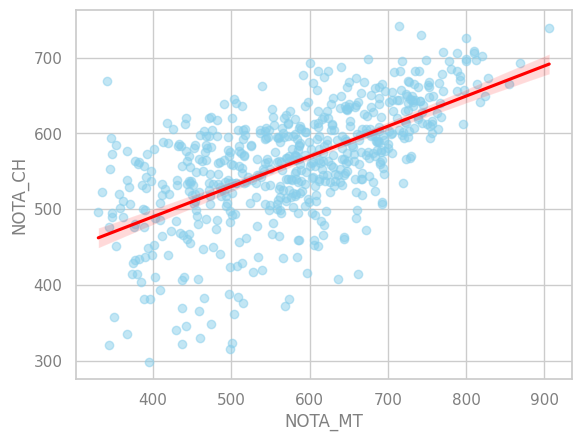

In [26]:
sns.regplot(x=X, y=y, scatter_kws={'alpha': 0.5, 'color': 'skyblue'},
            line_kws={'color': 'red'});

Observando o gráfico, é possível identificar relação de linear entre as variáveis.

## Distribuição
A não-normalidade dos dados foi constatada anteriormente no estudo de correlação. Não obstante, podemos verificar se a presença de outliers tem influência nisso, pelo fato de objetivamente o método RANSAC lidar com isso.

In [27]:
df_out = pd.melt(df2, value_vars=df2[['NOTA_CH', 'NOTA_MT']].columns,
                 var_name='PROVAS', value_name='NOTA')

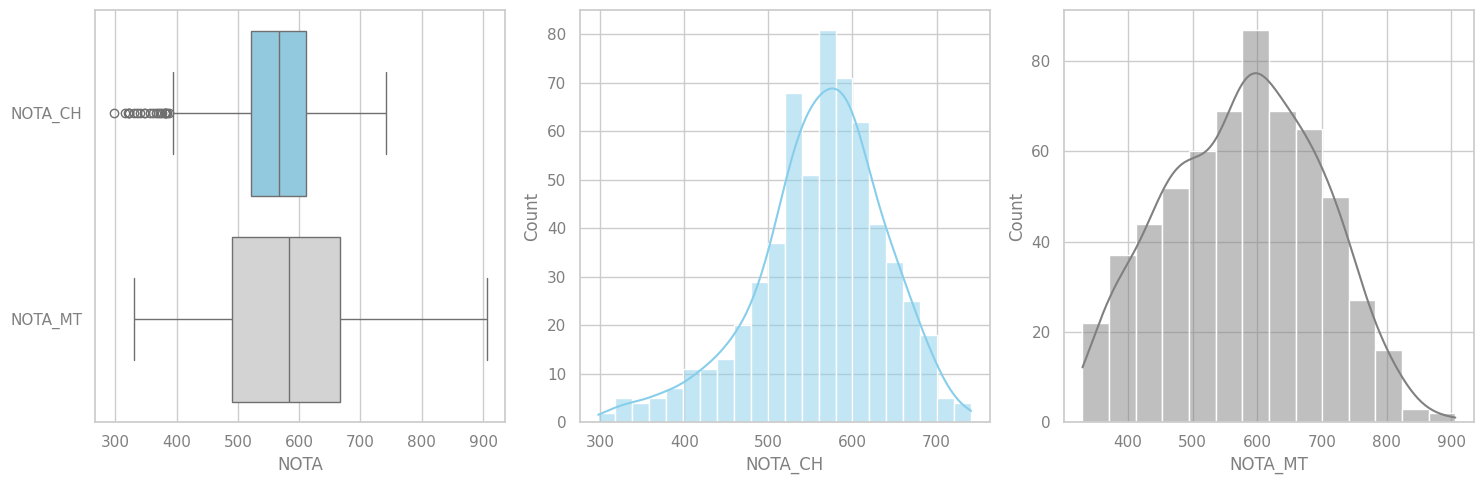

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df_out, x='NOTA', y='PROVAS', hue='PROVAS',
            palette=['skyblue', 'lightgrey'], ax=ax[0])

sns.histplot(data=df2, x='NOTA_CH', kde=True, ax=ax[1], color='skyblue')
sns.histplot(data=df2, x='NOTA_MT', kde=True, ax=ax[2], color='grey')

ax[0].set_ylabel('')

plt.tight_layout()

A partir dos gráficos, podemos constatar a presença de outliers, bem como observar a violação da normalidade. Não obstante, o método RANSAC pode lidar com isso.

## Ajuste do modelo
Utilizaremos a técnica de otimização matemática dos Mínimos Quadrados Ordinários para estimar os coeficientes do método RANSAC.  
1\. IMPLEMENTAÇÃO DO MODELO  
A linha que representa a relação entre as variáveis em um modelo de regressão linear simples é formulada pela seguinte equação:

$$y = α + β.x + ϵ$$

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [31]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

In [32]:
ransac = RANSACRegressor(estimator=LinearRegression(), random_state=42)

ransac.fit(X_train, y_train.values.ravel())

RANSACRegressor(estimator=LinearRegression(), random_state=42)

1) Seleção do threshold  
Primeiramente, devemos selecionar o threshold para implementar o modelo ransac final, baseado em um modelo padrão inicial. A métrica escolhida será a do percentil.

In [33]:
import numpy as np

In [34]:
residuos = np.abs(y_train.values.ravel() - ransac.predict(X_train))

percentil = np.percentile(residuos, 75)

print(f'Threshold (75º percentil): {percentil}')

Threshold (75º percentil): 67.67288208007812


O resultado significa que, se a diferença entre a previsão do modelo e o valor real de um ponto for menor ou igual a 67.67, o ponto será considerado inlier, caso contrário, outlier.

2) Criação e treinamento do modelo

In [35]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

In [36]:
model = RANSACRegressor(
    estimator=LinearRegression(),
    residual_threshold=percentil,
    random_state=42
)

model.fit(X_train, y_train.values.ravel())

RANSACRegressor(estimator=LinearRegression(), random_state=42,
                residual_threshold=67.67288208007812)

2\. ESTIMATIVA DOS PARÂMETROS  
Processo de determinar os valores dos coeficientes que definem a equação da linha de melhor ajuste aos dados.  
Para estimar os parâmetros *α* e *β*, utilizamos a soma dos quadrados dos resíduos.

1) Coeficientes da regressão  
Indicam como a variável independente afeta a dependente.

**COEFICIENTE LINEAR (α ou β<sub>0</sub>)**  
O intercepto representa o valor esperado na variável dependente quando a independente é igual a zero.

In [37]:
model.estimator_.intercept_

259.56885

O resultado sugere que uma nota zero em Matemática e suas Tecnologias (NOTA_MT) teria uma nota estimada de aproximadamente 259.57 em Ciências Humanas e suas Tecnologias (NOTA_CH). Como valores zero para NOTA_MT não ocorrem, o intercepto se torna uma extrapolação matemática com menor relevância prática. Dessa forma, ele funciona apenas como um ajuste técnico para o modelo.

**COEFICIENTE ANGULAR (β ou β<sub>1</sub>)**  
Cada slope representa a variação média esperada na variável dependente para cada unidade incrementada na respectiva variável independente, assumindo que a relação linear seja válida e que todos os demais fatores sejam mantidos constantes.

In [38]:
model.estimator_.coef_

array([0.50572336], dtype=float32)

Cada aumento de 1 ponto em NOTA_MT está associado a um aumento estimado de aproximadamente 0.51 pontos em NOTA_CH. Isso sugere uma relação positiva entre as duas variáveis, indicando que alunos com melhor desempenho em Matemática tendem a ter também notas mais altas em Ciências Humanas, embora a força dessa relação seja moderada.

## Avaliação do modelo
1\. COEFICIENTE DE DETERMINAÇÃO  
Medida estatística que quantifica o quanto a linha de regressão se ajusta aos dados.

1) Global  
Variância total de *NOTA_CH* explicada pelo modelo, considerando todos os dados.  
**RANSAC**

In [39]:
model.score(X_train, y_train)

0.3193312883377075

O valor relativamente baixo sugere que a presença de outliers afeta negativamente a capacidade explicativa global do modelo, apesar de o RANSAC ser robusto a dados atípicos.

**OLS**

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_train)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_train, y_pred_lin)

0.37372082471847534

Este valor é ligeiramente maior que o R<sup>2</sup> global do RANSAC. Isso pode sugerir que o modelo tradicional de Mínimos Quadrados Ordinários (OLS) está mais influenciado pelos outliers. Em contextos onde os outliers têm impacto significativo, isso pode indicar que o modelo OLS não é tão confiável, apesar de apresentar R<sup>2</sup> global mais alto

2) Apenas inliers  
Avalia somente os inliers identificados pelo modelo RANSAC.

In [43]:
# Identificando inliers e outliers
inlier_mask = model.inlier_mask_
outlier_mask = ~inlier_mask

y_pred_train = model.predict(X_train)

In [44]:
r2_score(y_train[inlier_mask], y_pred_train[inlier_mask])

0.7327128052711487

O valor significativamente mais alto, indica que quando o modelo é avaliado somente nos inliers, cerca de 73% da variância de NOTA_CH é explicada. Isso reflete um ajuste muito melhor no subconjunto representativo de dados, indicando que o método RANSAC está funcionando conforme esperado, identificando e ignorando os outliers.

**CONCLUSÃO**  
Embora o R<sup>2</sup> global do OLS seja maior que o do RANSAC, isso pode ser enganoso, pois o OLS não é robusto a outliers. O maior pode refletir a influência de pontos extremos, que distorcem a relação linear.  O alto R<sup>2</sup> para os inliers no RANSAC (0.7327) reforça que este método é mais confiável para representar a relação linear verdadeira dentro do subconjunto representativo dos dados.

2\. PREVISÕES

In [45]:
y_pred_test = model.predict(X_test)

In [46]:
pd.DataFrame({'VALOR_REAL': y_test.squeeze(), 'PREVISAO': y_pred_test})

,VALOR_REAL,PREVISAO
3706,661.500000,640.226807
12141,635.099976,602.803284
12989,592.099976,567.908386
3218,666.099976,646.497803
5181,641.500000,630.061768
...,...,...
8761,602.400024,560.524780
4601,648.799988,629.404297
11535,528.500000,457.205536
10758,522.700012,507.575562


A partir dos resultados, é possível supor que a discrepância entre os mesmos parece não ser grande. Não obstante, podemos medir estatisticamente essa diferença com a Raiz do Erro Quadrático Médio.

3\. RMSE  
A Raiz do Erro Quadrático Médio (RMSE) pode ser interpretada como o desvio padrão do erro médio.


In [47]:
from sklearn.metrics import root_mean_squared_error

In [48]:
rmse_global = root_mean_squared_error(y_train, y_pred_train)
rmse_inliers = root_mean_squared_error(y_train[inlier_mask],
                                       y_pred_train[inlier_mask])

print(f'RMSE (global): {rmse_global}')
print(f'RMSE (apenas inliers): {rmse_inliers}')

RMSE (global): 62.0791015625
RMSE (apenas inliers): 34.04063415527344


A diferença entre o RMSE global e o dos inliers evidencia que os outliers impactam substancialmente a qualidade do ajuste global. Isso reforça a importância do método RANSAC, que é projetado para minimizar a influência de outliers. Sem o método, os outliers poderiam distorcer a interpretação e a qualidade do ajuste

4\. Proporção de inliers

In [49]:
soma_inliers = sum(inlier_mask)
soma_outliers = sum(outlier_mask)
perc_inliers = np.mean(model.inlier_mask_) * 100
perc_outliers = np.mean(~model.inlier_mask_) * 100

print(f'Total de inliers: {soma_inliers}')
print(f'Total de outliers: {soma_outliers}')
print(f'Proporção de inliers: {perc_inliers}')
print(f'Proporção de outliers: {perc_outliers}')

Total de inliers: 335
Total de outliers: 147
Proporção de inliers: 69.50207468879668
Proporção de outliers: 30.49792531120332


Uma proporção de ~70% de inliers é razoável e indica que o método RANSAC foi capaz de identificar um conjunto representativo de dados para a análise (levando em consideração a escala dos dados e o threshold).

5\. INLIERS x OUTLIERS  
Por fim, podemos visualizar a proporção de inliers e outliers, bem como a relação dos inliers com a reta de regressão ajustada RANSAC.

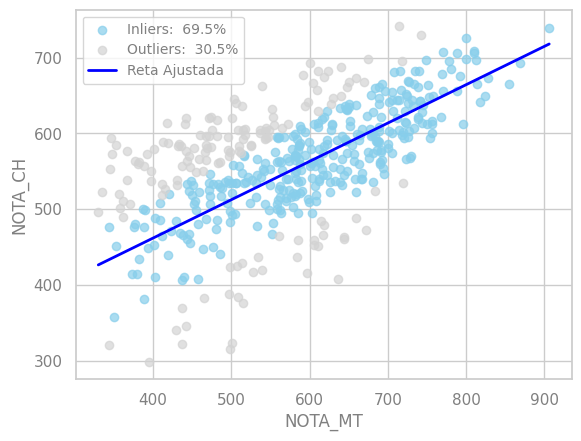

In [50]:
# Previsões para reta de regressão
line_X = pd.DataFrame(np.linspace(X_train.min(), X_train.max(), 100),
                      columns=['NOTA_MT'])
line_y = model.predict(line_X)

# Inliers
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], color='skyblue',
            label=f'Inliers: {perc_inliers: .1f}%', alpha=0.7)
# Outliers
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], color='lightgrey',
            label=f'Outliers: {perc_outliers: .1f}%', alpha=0.7)

plt.plot(line_X, line_y, color='blue', label='Reta Ajustada',
         linewidth=2)

plt.xlabel("NOTA_MT")
plt.ylabel("NOTA_CH")
plt.legend(fontsize=10);

A reta ajustada representa o modelo linear estimado pelo RANSAC, com base nos inliers, que se dispersam ao entorno da mesma.